In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import mannwhitneyu


In [59]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

In [60]:
fall_path = ('' if IN_COLAB else '../Data/') + 'daily_fall_22_23.csv'
falldf = pd.read_csv(fall_path, parse_dates=['date'])

Otázka: Zmenilo pridanie cyklocesty na
Vajanského nábreží (6.9.2023) trendy v správaní cyklistov?

H₀: Denné počty cyklistov na vybraných trasách v období september-október v rokoch 2022 a 2023 sa nelíšia.

H₁: Denné počty cyklistov na vybraných trasách v období september-október v rokoch 2022 a 2023 sa líšia.

In [61]:
routes_to_use = falldf['nazov'].unique()
yearly_avg = falldf.groupby(['year', 'date'])['daily_total'].mean().reset_index()
sept_oct_2022 = falldf[(falldf['year'] == 2022)]
sept_oct_2023 = falldf[(falldf['year'] == 2023)]

changes = []
for route in routes_to_use:
    mean_2022 = sept_oct_2022[sept_oct_2022['nazov'] == route]['daily_total'].mean()
    mean_2023 = sept_oct_2023[sept_oct_2023['nazov'] == route]['daily_total'].mean()
    pct_change = ((mean_2023 - mean_2022) / mean_2022) * 100
    changes.append((route, pct_change, mean_2022, mean_2023))

changes.sort(key=lambda x: x[1], reverse=True)

print("Porovnanie relatívnej zmeny priemernej vyťaženosti z obdobia september-október v rokoch 2022 a 2023")
print("\nTrasy s nárastom:")
for i, (route, change, m2022, m2023) in enumerate(changes):
    if change < 0:
        continue
    print(f"{i+1}. {route[:25]:25} {change:+.1f}% ({m2022:.0f} > {m2023:.0f})")

print("\nTrasy s poklesom:")
for i, (route, change, m2022, m2023) in enumerate(changes):
    if change >= 0:
        continue
    print(f"{i+1}. {route[:25]:25} {change:+.1f}% ({m2022:.0f} > {m2023:.0f})")

print("\nRozdelenie podľa vzdialenosti od Vajanského")
routes_near_vajanskeho = ['Viedenska', '#3 - River Park', '#1 - Starý Most']
routes_far_away = ['Cyklomost Slobody', 'Hradza Berg', 'Devinska Nova Ves', '#4 - Dolnozemská']

print("\nTrasy blízko Vajanského:")
for route in routes_near_vajanskeho:
    if route in [c[0] for c in changes]:
        change = [c[1] for c in changes if c[0] == route][0]
        print(f"{route:25}: {change:+.1f}%")

print("\nTrasy ďaleko od Vajanského:")
for route in routes_far_away:
    if route in [c[0] for c in changes]:
        change = [c[1] for c in changes if c[0] == route][0]
        print(f"{route:25}: {change:+.1f}%")

Porovnanie relatívnej zmeny priemernej vyťaženosti z obdobia september-október v rokoch 2022 a 2023

Trasy s nárastom:
1. Devinska Nova Ves         +52.1% (140 > 213)
2. Hradza Berg               +47.5% (270 > 399)
3. #4 - Dolnozemská          +38.1% (1208 > 1668)
4. Cyklomost Slobody         +35.8% (408 > 554)
5. Viedenska                 +31.3% (538 > 706)
6. #3 - River Park           +13.4% (1006 > 1141)

Trasy s poklesom:
7. #1 - Starý Most           -17.3% (881 > 729)

Rozdelenie podľa vzdialenosti od Vajanského

Trasy blízko Vajanského:
Viedenska                : +31.3%
#3 - River Park          : +13.4%
#1 - Starý Most          : -17.3%

Trasy ďaleko od Vajanského:
Cyklomost Slobody        : +35.8%
Hradza Berg              : +47.5%
Devinska Nova Ves        : +52.1%
#4 - Dolnozemská         : +38.1%


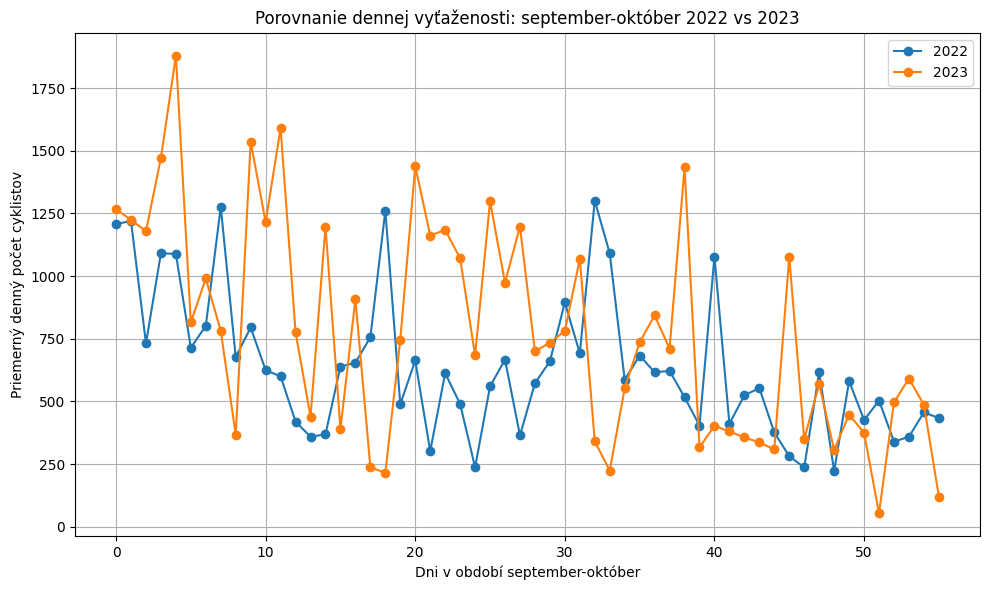

In [62]:
plt.figure(figsize=(10, 6))
for year in [2022, 2023]:
    year_data = yearly_avg[yearly_avg['year'] == year]
    plt.plot(range(len(year_data)), year_data['daily_total'],
             marker='o', label=f'{year}')

plt.xlabel('Dni v období september-október')
plt.ylabel('Priemerný denný počet cyklistov')
plt.title('Porovnanie dennej vyťaženosti: september-október 2022 vs 2023')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [63]:
alpha = 0.05 / len(routes_to_use) # Bonferroni correction
print("Mann Whitney U test")

all_2022 = sept_oct_2022['daily_total']
all_2023 = sept_oct_2023['daily_total']
overall_stat, overall_p = mannwhitneyu(all_2022, all_2023, alternative='two-sided')
overall_mean_2022 = all_2022.mean()
overall_mean_2023 = all_2023.mean()
overall_pct_change = ((overall_mean_2023 - overall_mean_2022) / overall_mean_2022) * 100

print(f"\nTest priemeru zo všetkých trás")
print(f"Priemer 2022 (sept-okt): {overall_mean_2022:.1f} cyklistov/deň")
print(f"Priemer 2023 (sept-okt): {overall_mean_2023:.1f} cyklistov/deň")
print(f"Celková zmena: {overall_pct_change:+.1f}%")
print(f"p-hodnota: {overall_p:.4f}")

results = []
for route in routes_to_use:
    data_2022 = sept_oct_2022[sept_oct_2022['nazov'] == route]['daily_total']
    data_2023 = sept_oct_2023[sept_oct_2023['nazov'] == route]['daily_total']

    stat, p_value = mannwhitneyu(data_2022, data_2023, alternative='two-sided')

    mean_2022 = data_2022.mean()
    mean_2023 = data_2023.mean()
    pct_change = ((mean_2023 - mean_2022) / mean_2022) * 100

    results.append({
        'route': route,
        'mean_2022': mean_2022,
        'mean_2023': mean_2023,
        'percent_change': pct_change,
        'p_value': p_value
    })

results_df = pd.DataFrame(results)
print("\nVýsledky testu pre jednotlivé trasy")
display(results_df.sort_values('p_value').reset_index(drop=True))

sig_count = (results_df['p_value'] < alpha).sum()
print(f"\nZ {len(results_df)} trás je po Bonferroniho korekcii štatisticky významne odlišných: {sig_count}")


Mann Whitney U test

Test priemeru zo všetkých trás
Priemer 2022 (sept-okt): 638.3 cyklistov/deň
Priemer 2023 (sept-okt): 774.8 cyklistov/deň
Celková zmena: +21.4%
p-hodnota: 0.0410

Výsledky testu pre jednotlivé trasy


,route,mean_2022,mean_2023,percent_change,p_value
0,Hradza Berg,270.407407,398.781818,47.474443,0.012740
1,Devinska Nova Ves,140.148148,213.222222,52.140592,0.016695
2,Viedenska,538.000000,706.254545,31.274079,0.027590
3,#4 - Dolnozemská,1207.535714,1667.890909,38.123526,0.031803
4,#1 - Starý Most,881.137255,728.909091,-17.276328,0.042383
5,Cyklomost Slobody,407.727273,553.666667,35.793385,0.087430
6,#3 - River Park,1006.339286,1140.781818,13.359563,0.339327



Z 7 trás je po Bonferroniho korekcii štatisticky významne odlišných: 0
